In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [11]:
# Ìè¥Îçî Í≤ΩÎ°ú
folder_path = r"C:\Users\user\Desktop\DriveÌååÏùº\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. Ïã§ÌóòÏûêÎ£å\4. Data measurement\250830_Squalane ÌèâÍ∞Ä\minimized_csvÌååÏùº\Hexa"

# ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ïÍ∞í
prominence_ratio = 0.3   # ÌëúÏ§ÄÌé∏Ï∞®(std) * ÎπÑÏú®Î°ú prominence Í∏∞Ï§Ä ÏÑ§Ï†ï
min_prominence   = 0.1   # prominence ÌïòÌïú
min_distance_sec = 0.15  # Ïù∏Ï†ë ÌîºÌÅ¨ ÏµúÏÜå Í∞ÑÍ≤©(Ï¥à)
snr_threshold    = 1     # SNR Í∏∞Ï§Ä
min_relative_height = 0.01  # Ï†ÑÏ≤¥ ÏµúÎåÄ ÏßÑÌè≠ ÎåÄÎπÑ ÏµúÏÜå ÎπÑÏú®
window_peaks = 5         # <<<< Ïó∞ÏÜç ÌîºÌÅ¨ Í∞úÏàò(ÏöîÏ≤≠: 5Í∞ú)

# Í∑∏ÎûòÌîÑ YÏ∂ï
y_range = (-30, 10)

Cut_hexa_000_Vpp: 10.05 V
Cut_hexa_000_Peak number: 4Í∞ú
Cut_hexa_000_ÌëúÏ§ÄÌé∏Ï∞®: 0.74
Cut_hexa_000_Ï£ºÌååÏàò: 1.91 Hz
üëâ Cut_hexa_000 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 1.3948, 1.9156, 2.4428, 2.9658, 3.4937
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 9.75, 8.79, 7.13, 9.74, 10.66
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 46.06
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 10.05 V (ÌëúÏ§ÄÌé∏Ï∞®: 0.74 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.91 Hz


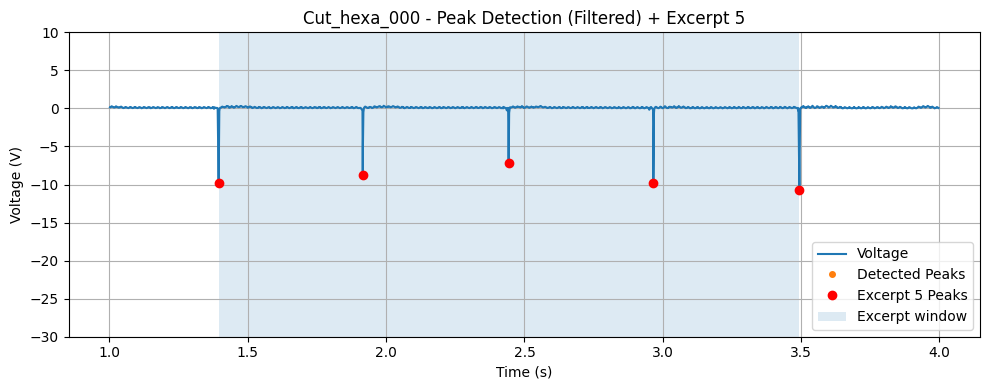

Cut_hexa_010_Vpp: 13.58 V
Cut_hexa_010_Peak number: 4Í∞ú
Cut_hexa_010_ÌëúÏ§ÄÌé∏Ï∞®: 1.68
Cut_hexa_010_Ï£ºÌååÏàò: 1.84 Hz
üëâ Cut_hexa_010 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 1.5099, 2.0501, 2.5767, 3.1401, 3.6843
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 12.25, 14.74, 9.43, 11.82, 8.93
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 57.17
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 13.58 V (ÌëúÏ§ÄÌé∏Ï∞®: 1.68 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.84 Hz


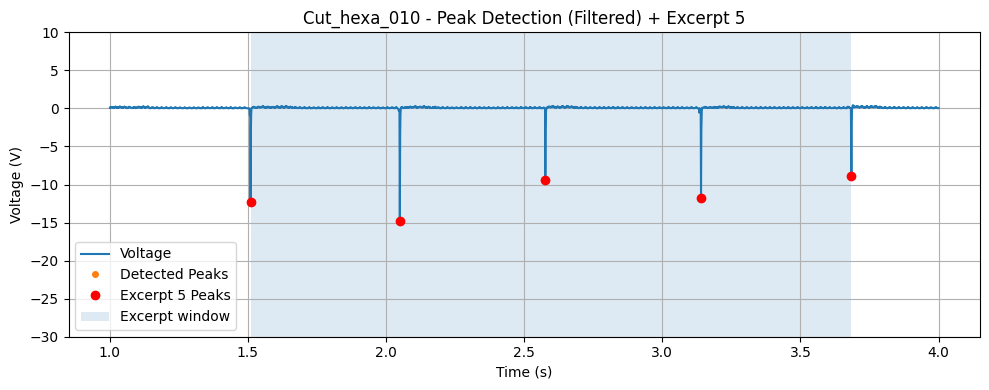

hexa_000_Vpp: 9.02 V
hexa_000_Peak number: 19Í∞ú
hexa_000_ÌëúÏ§ÄÌé∏Ï∞®: 1.95
hexa_000_Ï£ºÌååÏàò: 2.00 Hz
üëâ hexa_000 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 1.3948, 1.9156, 2.4428, 2.9658, 3.4937
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 9.75, 8.79, 7.13, 9.74, 10.66
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 46.06
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 10.05 V (ÌëúÏ§ÄÌé∏Ï∞®: 0.74 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.91 Hz


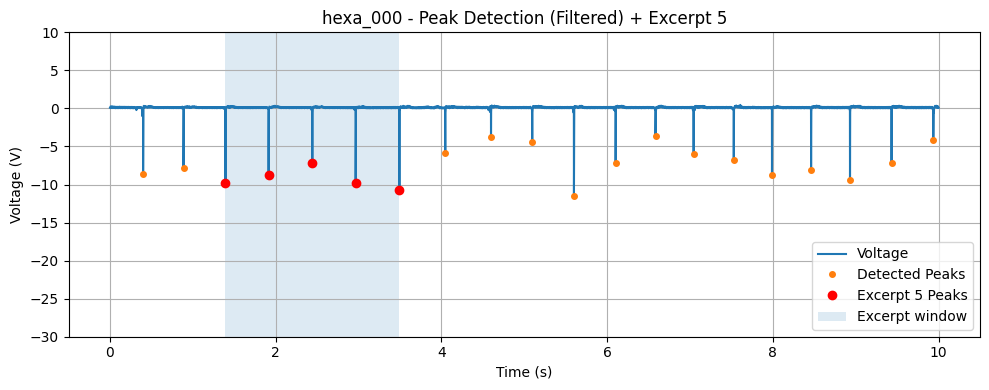

hexa_010_Vpp: 13.63 V
hexa_010_Peak number: 18Í∞ú
hexa_010_ÌëúÏ§ÄÌé∏Ï∞®: 2.18
hexa_010_Ï£ºÌååÏàò: 1.96 Hz
üëâ hexa_010 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 0.4520, 0.9803, 1.5099, 2.0501, 2.5767
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 13.27, 15.54, 12.25, 14.74, 9.43
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 65.22
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 15.42 V (ÌëúÏ§ÄÌé∏Ï∞®: 0.45 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.88 Hz


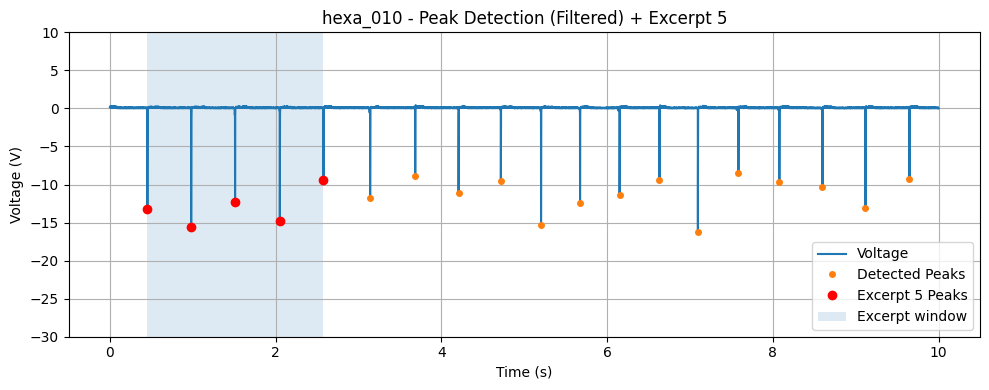

hexa_020_Vpp: 14.76 V
hexa_020_Peak number: 16Í∞ú
hexa_020_ÌëúÏ§ÄÌé∏Ï∞®: 2.89
hexa_020_Ï£ºÌååÏàò: 1.79 Hz
üëâ hexa_020 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 2.8706, 3.3395, 3.8155, 4.2998, 4.7641
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 18.15, 16.89, 15.44, 11.28, 11.00
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 72.76
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 15.74 V (ÌëúÏ§ÄÌé∏Ï∞®: 3.00 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 2.11 Hz


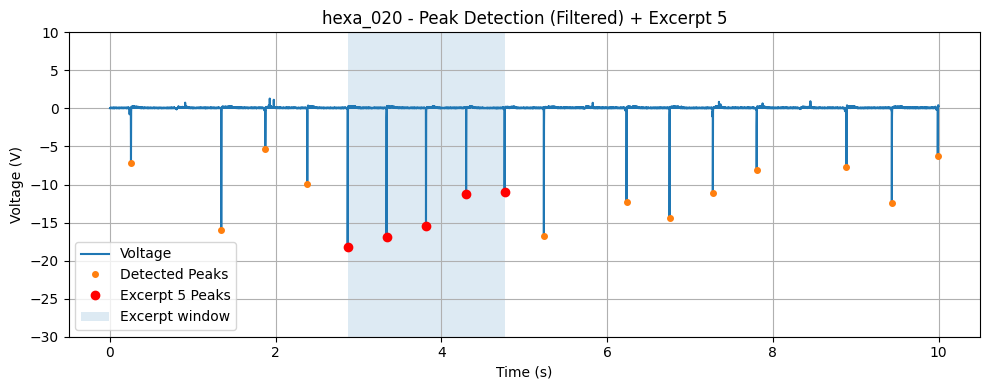

hexa_030_Vpp: 13.93 V
hexa_030_Peak number: 19Í∞ú
hexa_030_ÌëúÏ§ÄÌé∏Ï∞®: 2.93
hexa_030_Ï£ºÌååÏàò: 1.97 Hz
üëâ hexa_030 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 2.6393, 3.1140, 3.5862, 4.0868, 4.5948
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 15.32, 14.57, 16.51, 12.16, 14.17
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 72.73
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 15.95 V (ÌëúÏ§ÄÌé∏Ï∞®: 1.09 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 2.05 Hz


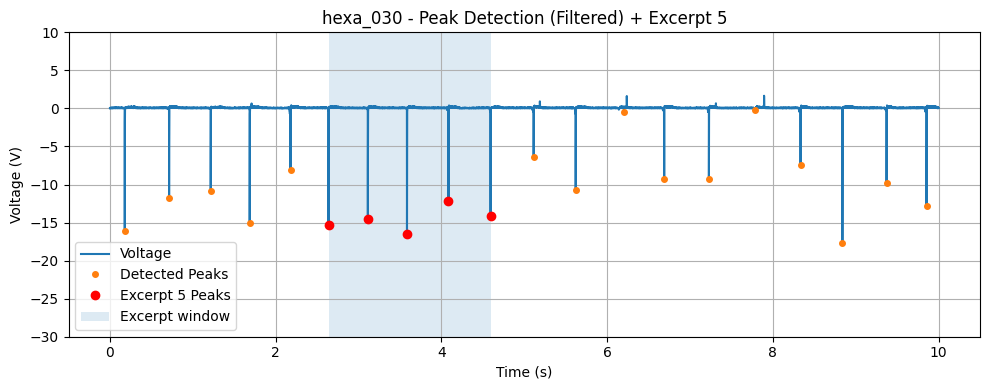

hexa_040_Vpp: 16.37 V
hexa_040_Peak number: 18Í∞ú
hexa_040_ÌëúÏ§ÄÌé∏Ï∞®: 2.31
hexa_040_Ï£ºÌååÏàò: 1.97 Hz
üëâ hexa_040 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 3.9060, 4.4002, 4.9041, 5.4138, 5.9298
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 17.98, 17.35, 15.90, 16.23, 14.39
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 81.85
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 17.25 V (ÌëúÏ§ÄÌé∏Ï∞®: 0.89 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.98 Hz


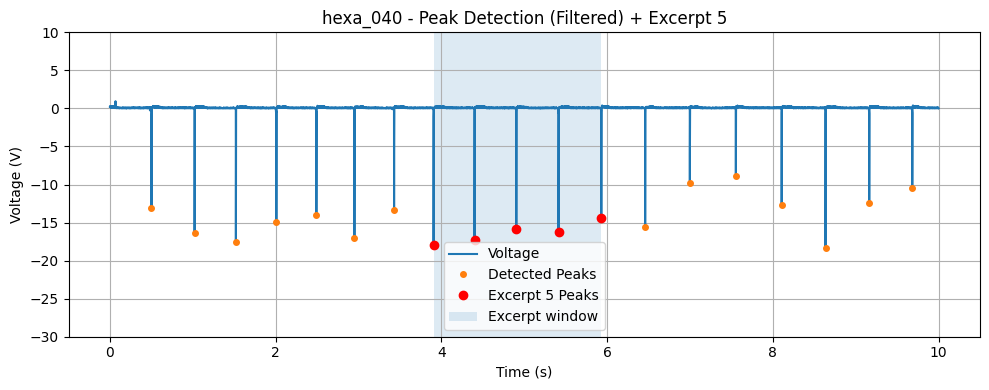

hexa_050_Vpp: 15.94 V
hexa_050_Peak number: 20Í∞ú
hexa_050_ÌëúÏ§ÄÌé∏Ï∞®: 2.22
hexa_050_Ï£ºÌååÏàò: 2.09 Hz
üëâ hexa_050 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 5.8923, 6.4119, 6.9124, 7.3713, 7.8117
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 16.64, 15.51, 16.13, 15.11, 18.99
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 82.38
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 17.28 V (ÌëúÏ§ÄÌé∏Ï∞®: 1.37 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 2.09 Hz


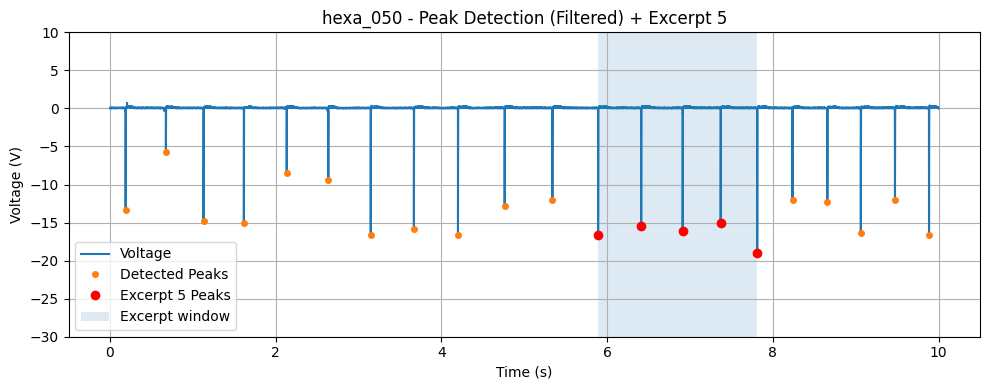

hexa_100_Vpp: 17.27 V
hexa_100_Peak number: 19Í∞ú
hexa_100_ÌëúÏ§ÄÌé∏Ï∞®: 1.51
hexa_100_Ï£ºÌååÏàò: 1.97 Hz
üëâ hexa_100 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 7.3970, 7.9398, 8.4805, 9.0050, 9.4947
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 15.70, 16.34, 17.45, 16.34, 18.65
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 84.47
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 17.83 V (ÌëúÏ§ÄÌé∏Ï∞®: 0.94 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.91 Hz


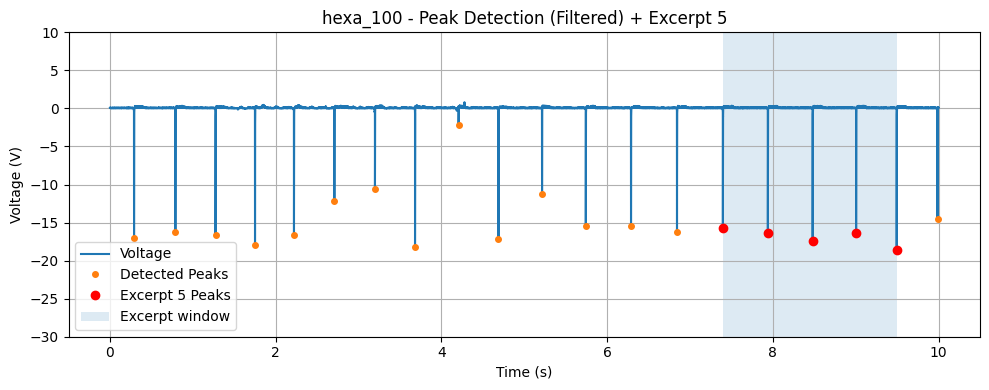

hexa_150_Vpp: 16.11 V
hexa_150_Peak number: 18Í∞ú
hexa_150_ÌëúÏ§ÄÌé∏Ï∞®: 1.28
hexa_150_Ï£ºÌååÏàò: 1.94 Hz
üëâ hexa_150 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 1.5929, 2.1167, 2.6214, 3.1117, 3.5923
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 13.98, 16.00, 16.74, 16.07, 16.24
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 79.03
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 16.78 V (ÌëúÏ§ÄÌé∏Ï∞®: 0.39 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 2.00 Hz


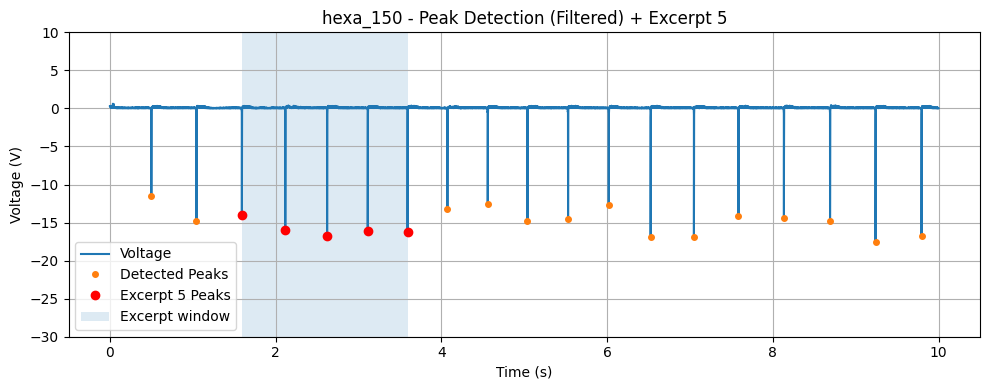

hexa_200_Vpp: 16.58 V
hexa_200_Peak number: 18Í∞ú
hexa_200_ÌëúÏ§ÄÌé∏Ï∞®: 2.72
hexa_200_Ï£ºÌååÏàò: 1.90 Hz
üëâ hexa_200 Î∞úÏ∑å(Ïó∞ÏÜç 5Í∞ú) Ï†ïÎ≥¥
   - ÌîºÌÅ¨ ÏãúÍ∞Ñ(s): 3.8748, 4.4103, 4.9553, 5.5193, 6.0719
   - ÌîºÌÅ¨ ÌÅ¨Í∏∞(V, -voltage): 19.39, 19.46, 17.46, 15.46, 18.09
   - Ìï©Í≥Ñ(ÌîºÌÅ¨ ÌÅ¨Í∏∞ Ìï©): 89.86
   - Î∞úÏ∑å ÌèâÍ∑† Vpp: 19.01 V (ÌëúÏ§ÄÌé∏Ï∞®: 1.01 V)
   - Î∞úÏ∑å ÌèâÍ∑† Ï£ºÌååÏàò: 1.82 Hz


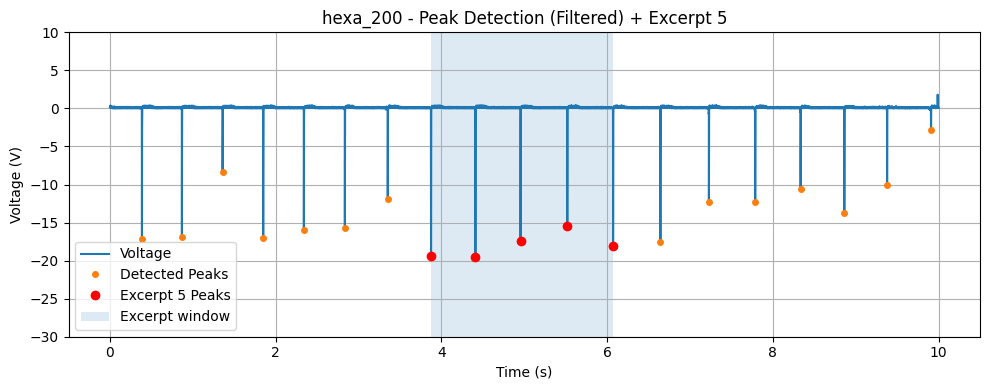


üéØ Î™®Îì† ÌååÏùº Î∞úÏ∑å Í≤∞Í≥º ÏöîÏïΩ (Ïó∞ÏÜç 5Í∞ú ÌîºÌÅ¨ Í∏∞Ï§Ä)
Cut_hexa_000.csv | Vpp: 10.05 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.74 V | Ï£ºÌååÏàò: 1.91 Hz
Cut_hexa_010.csv | Vpp: 13.58 V | ÌëúÏ§ÄÌé∏Ï∞®: 1.68 V | Ï£ºÌååÏàò: 1.84 Hz
hexa_000.csv | Vpp: 10.05 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.74 V | Ï£ºÌååÏàò: 1.91 Hz
hexa_010.csv | Vpp: 15.42 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.45 V | Ï£ºÌååÏàò: 1.88 Hz
hexa_020.csv | Vpp: 15.74 V | ÌëúÏ§ÄÌé∏Ï∞®: 3.00 V | Ï£ºÌååÏàò: 2.11 Hz
hexa_030.csv | Vpp: 15.95 V | ÌëúÏ§ÄÌé∏Ï∞®: 1.09 V | Ï£ºÌååÏàò: 2.05 Hz
hexa_040.csv | Vpp: 17.25 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.89 V | Ï£ºÌååÏàò: 1.98 Hz
hexa_050.csv | Vpp: 17.28 V | ÌëúÏ§ÄÌé∏Ï∞®: 1.37 V | Ï£ºÌååÏàò: 2.09 Hz
hexa_100.csv | Vpp: 17.83 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.94 V | Ï£ºÌååÏàò: 1.91 Hz
hexa_150.csv | Vpp: 16.78 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.39 V | Ï£ºÌååÏàò: 2.00 Hz
hexa_200.csv | Vpp: 19.01 V | ÌëúÏ§ÄÌé∏Ï∞®: 1.01 V | Ï£ºÌååÏàò: 1.82 Hz

üìä Î∞úÏ∑å Íµ¨Í∞Ñ Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: 15.36 V
üìâ Î∞úÏ∑å Íµ¨Í∞Ñ ÌëúÏ§ÄÌé∏Ï∞®(Vpp): 2.98 V
üéµ Î∞úÏ∑å Íµ¨Í∞Ñ ÌèâÍ∑† Ï£ºÌååÏàò: 1.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# ========================
# ÏÑ§Ï†ï ÌååÎùºÎØ∏ÌÑ∞
# ========================
min_distance_sec = 0.1
prominence_ratio = 0.3
min_prominence = 0.05
min_relative_height = 0.2
snr_threshold = 2.0
window_peaks = 5
y_range = (-10, 10)   # Í∑∏ÎûòÌîÑ YÏ∂ï Î≤îÏúÑ

# ========================
# Ïú†Ìã∏ Ìï®Ïàò
# ========================

def detect_peaks(time, voltage):
    """ÌîºÌÅ¨ Í≤ÄÏ∂ú Î∞è ÌïÑÌÑ∞ÎßÅ"""
    total_time = time[-1] - time[0]
    sampling_rate = len(time) / total_time
    distance = int(sampling_rate * min_distance_sec)

    prom = max(np.std(voltage) * prominence_ratio, min_prominence)
    raw_peaks, _ = find_peaks(-voltage, prominence=prom, distance=distance)

    final_peaks = []
    max_amp = np.max(-voltage) if len(voltage) else 0
    for i in raw_peaks:
        left, right = max(0, i - int(0.05 * sampling_rate)), min(len(voltage), i + int(0.05 * sampling_rate))
        local_noise = max(np.std(voltage[left:right]), 1e-6)
        if -voltage[i] > max_amp * min_relative_height and (-voltage[i] / local_noise) > snr_threshold:
            final_peaks.append(i)
    return np.array(final_peaks, dtype=int)


def compute_vpp_and_freq(time, voltage, peaks):
    """VppÏôÄ Ï£ºÌååÏàò Í≥ÑÏÇ∞"""
    if len(peaks) < 2:
        return 0.0, 0.0, 0.0

    vpp_list = [np.max(voltage[s:e+1]) - np.min(voltage[s:e+1]) for s, e in zip(peaks[:-1], peaks[1:])]
    mean_vpp, std_vpp = np.mean(vpp_list), np.std(vpp_list, ddof=1) if len(vpp_list) > 1 else 0.0
    mean_freq = np.mean(1.0 / np.diff(time[peaks]))
    return mean_vpp, std_vpp, mean_freq


def best_excerpt(time, voltage, peaks):
    """Ïó∞ÏÜçÎêú window_peaks Ï§ë Ìï©Ïù¥ ÏµúÎåÄÏù∏ Íµ¨Í∞Ñ ÏÑ†ÌÉù"""
    if len(peaks) < window_peaks:
        return None

    mags = -voltage[peaks].astype(float)
    csum = np.cumsum(mags)
    sums = csum[window_peaks-1:] - np.concatenate(([0.0], csum[:-window_peaks]))
    start = int(np.argmax(sums))
    excerpt_idx = peaks[start:start+window_peaks]

    mean_vpp, std_vpp, mean_freq = compute_vpp_and_freq(time, voltage, excerpt_idx)
    return excerpt_idx, mags[start:start+window_peaks], mean_vpp, std_vpp, mean_freq


def plot_result(time, voltage, peaks, excerpt_idx=None, base_name=""):
    """Í≤∞Í≥º ÌîåÎ°úÌåÖ"""
    plt.figure(figsize=(10, 4))
    plt.plot(time, voltage, label="Voltage")
    if len(peaks) > 0:
        plt.plot(time[peaks], voltage[peaks], 'o', ms=4, label="Detected Peaks")
    if excerpt_idx is not None:
        plt.plot(time[excerpt_idx], voltage[excerpt_idx], 'ro', ms=6, label=f"Excerpt {window_peaks}")
        plt.axvspan(time[excerpt_idx[0]], time[excerpt_idx[-1]], alpha=0.15, label="Excerpt window")

    title = f"{base_name} - Peak Detection"
    if excerpt_idx is not None: title += f" + Excerpt {window_peaks}"
    plt.title(title)
    plt.xlabel("Time (s)"); plt.ylabel("Voltage (V)")
    plt.ylim(y_range); plt.grid(True); plt.legend(); plt.tight_layout()
    plt.show()


# ========================
# Î©îÏù∏ Î£®ÌîÑ
# ========================

def process_folder(folder_path):
    all_results = []
    excerpt_results = []

    csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    for file_name in csv_files:
        try:
            # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
            df = pd.read_csv(os.path.join(folder_path, file_name))
            time, voltage = df.iloc[:,0].values, df.iloc[:,1].values

            # ÌîºÌÅ¨ Í≤ÄÏ∂ú
            peaks = detect_peaks(time, voltage)

            # Ï†ÑÏ≤¥ Vpp/Freq
            mean_vpp, std_vpp, mean_freq = compute_vpp_and_freq(time, voltage, peaks)
            print(f"{file_name} | Vpp: {mean_vpp:.2f} V | ÌëúÏ§ÄÌé∏Ï∞®: {std_vpp:.2f} V | Ï£ºÌååÏàò: {mean_freq:.2f} Hz")

            all_results.append((file_name, mean_vpp, std_vpp, mean_freq))

            # Î∞úÏ∑å Íµ¨Í∞Ñ
            excerpt = best_excerpt(time, voltage, peaks)
            if excerpt:
                excerpt_idx, mags, e_vpp, e_std, e_freq = excerpt
                print(f"üëâ {file_name} Î∞úÏ∑å | Vpp: {e_vpp:.2f} V | ÌëúÏ§ÄÌé∏Ï∞®: {e_std:.2f} V | Ï£ºÌååÏàò: {e_freq:.2f} Hz")
                excerpt_results.append((file_name, e_vpp, e_std, e_freq))
                plot_result(time, voltage, peaks, excerpt_idx, file_name)
            else:
                plot_result(time, voltage, peaks, None, file_name)

        except Exception as e:
            print(f"{file_name} Ï≤òÎ¶¨ Ïò§Î•ò: {e}")

    # Ï†ÑÏ≤¥ ÏöîÏïΩ
    print("\n==============================")
    print(f"üéØ Î∞úÏ∑å Í≤∞Í≥º ÏöîÏïΩ (Ïó∞ÏÜç {window_peaks}Í∞ú)")
    for f, vpp, std, freq in excerpt_results:
        print(f"{f} | Vpp: {vpp:.2f} V | ÌëúÏ§ÄÌé∏Ï∞®: {std:.2f} V | Ï£ºÌååÏàò: {freq:.2f} Hz")

    if excerpt_results:
        vpps, freqs = [v for _,v,_,_ in excerpt_results], [f for *_,f in excerpt_results]
        print("\nüìä Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp:", np.mean(vpps).round(2), "V")
        print("üìâ Ï†ÑÏ≤¥ ÌëúÏ§ÄÌé∏Ï∞®(Vpp):", np.std(vpps, ddof=1).round(2), "V")
        print("üéµ Ï†ÑÏ≤¥ ÌèâÍ∑† Ï£ºÌååÏàò:", np.mean(freqs).round(2), "Hz")

# ========================
# Ïã§Ìñâ
# ========================
folder_path = "./data"  # Ìè¥Îçî Í≤ΩÎ°ú ÏàòÏ†ï
process_folder(folder_path)
